In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential, layers, Input

In [3]:
#loading the dataset

df = pd.read_pickle('Group_1_data_cleaned.pkl')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [5]:
from sklearn.preprocessing import LabelEncoder

columns = ['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login']

for i in columns:
    df[i] = LabelEncoder().fit_transform(df[i])
    
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,2,45,4,105,146,0,0,0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,2,45,4,105,146,0,0,0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [7]:
features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

X = df[features]

### Linear Dimensionality Reduction with PCA

In [10]:
from sklearn import preprocessing 
X_scaled = preprocessing.scale(X) 

In [11]:
pd.DataFrame(data = X_scaled, columns = features)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144765,0.0,-0.011935,0.0,0.0,...,0.296271,0.438263,0.43273,-0.051345,-1.265071,-0.256096,-0.053103,0.0,-0.416124,-0.413777
1,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144765,0.0,-0.011935,0.0,0.0,...,0.296271,0.438263,0.43273,-0.051345,-1.265071,-0.256096,-0.053103,0.0,-0.416124,-0.413777
2,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144765,0.0,-0.011935,0.0,0.0,...,0.296271,0.438263,0.43273,-0.051345,-1.265071,-0.256096,-0.053103,0.0,-0.416124,-0.413777
3,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144765,0.0,-0.011935,0.0,0.0,...,0.296271,0.438263,0.43273,-0.051345,-1.244353,-0.256096,-0.053103,0.0,-0.416124,-0.413777
4,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144765,0.0,-0.011935,0.0,0.0,...,0.296271,0.449586,0.43273,-0.490738,-1.244353,-0.256096,-0.053103,0.0,-0.416124,-0.413777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274645,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144366,0.0,-0.011935,0.0,0.0,...,0.296271,0.449586,0.43273,-0.490738,-1.244353,-0.256096,-0.053103,0.0,-0.416124,-0.413777
274646,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144366,0.0,-0.011935,0.0,0.0,...,0.296271,0.449586,0.43273,-0.490738,-1.244353,-0.256096,-0.053103,0.0,-0.416124,-0.413777
274647,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144366,0.0,-0.011935,0.0,0.0,...,0.296271,0.449586,0.43273,-0.490738,-1.244353,-0.256096,-0.053103,0.0,-0.416124,-0.413777
274648,-0.039394,2.299363,1.630753,0.412987,-0.093603,-0.144366,0.0,-0.011935,0.0,0.0,...,0.296271,0.449586,0.43273,-0.490738,-1.244353,-0.256096,-0.053103,0.0,-0.416124,-0.413777


In [12]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Find the percentage of variance along each PC


In [13]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
per_var

array([4.019e+01, 1.584e+01, 5.710e+00, 5.450e+00, 5.290e+00, 3.590e+00,
       3.570e+00, 3.570e+00, 3.570e+00, 2.860e+00, 2.650e+00, 1.820e+00,
       1.570e+00, 1.420e+00, 1.230e+00, 5.900e-01, 4.300e-01, 2.600e-01,
       1.700e-01, 9.000e-02, 6.000e-02, 4.000e-02, 3.000e-02, 1.000e-02,
       1.000e-02, 1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

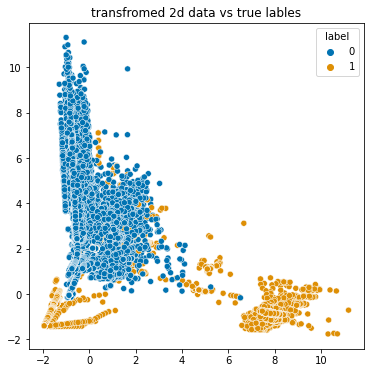

In [20]:
import seaborn as sns
df_pca =  pca.transform(X_scaled)
plt.figure(figsize=(6,6))

sns.scatterplot(data=X_scaled,x=df_pca[:,0], y=df_pca[:,1], hue=df['label'],palette='colorblind')
plt.title('transfromed 2d data vs true lables')
plt.show()

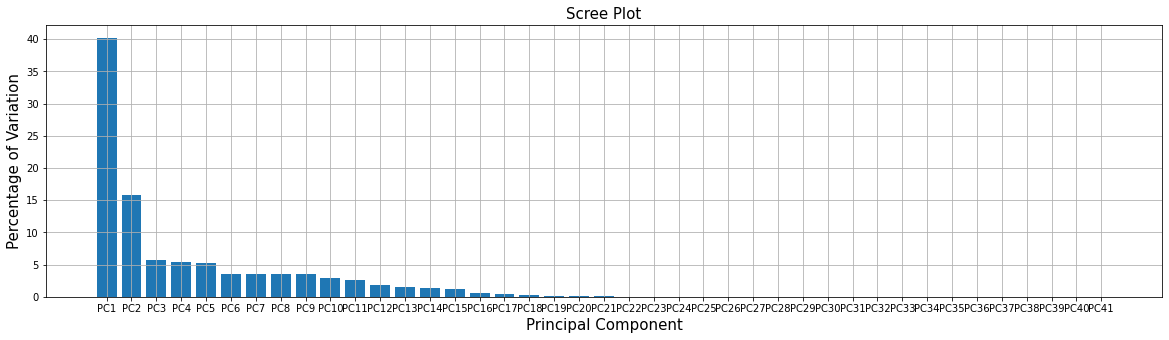

In [21]:
plt.figure(figsize = (20,5))

princ_comp = ['PC' + str(x) for x in range(1, 42)]

plt.bar(x = range(1, 42), height = per_var, tick_label = princ_comp)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.grid();

----

Note that the first two components explain most of the variation of our data

That means we'll use only PC1 and PC2, 
so we'll reduce the dimensionality of our data to 2 dimensions

---

In [22]:
pd.DataFrame(data = pca.components_, columns = princ_comp, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
duration,0.003285,1.527326e-01,2.354433e-01,-2.892069e-01,-9.551980e-03,-1.129056e-02,5.421011e-20,1.604974e-03,-2.646978e-23,-1.654361e-24,...,1.307647e-02,-2.848338e-01,-2.892680e-01,2.842835e-01,-2.057767e-01,-1.340651e-02,1.618226e-02,0.000000e+00,2.897855e-01,2.895827e-01
protocol_type,0.026089,3.010396e-01,1.418712e-01,8.836263e-02,1.622587e-02,2.422112e-01,4.336809e-19,6.549353e-03,-1.016440e-20,-8.470329e-22,...,-3.409044e-01,5.425825e-02,7.543133e-02,-3.407594e-02,-3.047090e-01,3.196316e-01,3.872025e-02,0.000000e+00,-8.722006e-02,-8.843438e-02
service,0.061431,-2.538310e-01,-2.307828e-01,-6.303658e-02,8.478525e-02,1.741300e-01,1.665335e-16,-1.807291e-02,2.775558e-16,-1.110223e-16,...,-2.917517e-01,-7.572239e-02,-5.885735e-02,-5.466720e-03,1.370184e-01,2.987078e-01,5.302680e-01,-0.000000e+00,6.032876e-02,6.292686e-02
flag,0.655054,-6.528211e-02,-7.131944e-02,-1.671699e-02,6.666289e-01,-2.078089e-03,2.775558e-17,-1.665558e-03,-5.551115e-17,-2.775558e-17,...,-1.286293e-01,-6.580949e-02,-1.371466e-02,-2.682205e-03,5.888323e-02,5.516077e-02,-2.019906e-01,0.000000e+00,1.501114e-02,1.519462e-02
src_bytes,0.232550,2.512774e-01,2.233390e-01,7.763638e-02,2.152331e-01,-2.170331e-01,2.220446e-16,2.078605e-02,1.942890e-16,1.665335e-16,...,2.914789e-01,6.782395e-02,6.923313e-02,7.246014e-03,-1.155887e-01,-3.340034e-01,4.178159e-01,-0.000000e+00,-7.753121e-02,-7.853904e-02
dst_bytes,-0.017548,2.316937e-02,1.862849e-02,6.136084e-03,3.746094e-04,-3.487588e-02,-8.326673e-17,7.964506e-01,-1.110223e-16,-8.326673e-17,...,-5.415933e-02,-1.638668e-02,-5.705630e-03,3.549707e-03,1.367037e-02,3.930655e-02,6.174518e-04,-0.000000e+00,-6.805045e-03,-6.064962e-03
land,-0.001025,-8.299876e-03,-7.471031e-03,1.562489e-03,-4.507936e-03,4.180939e-03,-6.071532e-18,6.325956e-02,1.040834e-17,0.000000e+00,...,-2.883601e-03,-1.057062e-02,-9.498403e-03,3.554749e-03,2.559330e-03,-2.130916e-03,8.509574e-05,0.000000e+00,-1.457320e-03,-4.103907e-04
wrong_fragment,0.000232,-5.168765e-04,4.623701e-03,-8.839290e-05,-2.559968e-03,2.303284e-03,1.008308e-17,-2.272482e-02,-4.163336e-17,-3.404395e-17,...,3.557467e-04,-5.956734e-05,-9.024956e-04,-2.676033e-03,4.453437e-04,2.809470e-03,9.031900e-06,-0.000000e+00,9.855835e-06,-4.759820e-04
urgent,-0.001094,-2.353194e-02,-2.158813e-02,7.212248e-04,5.994135e-04,1.793605e-02,1.474515e-17,5.950998e-01,1.491862e-16,6.071532e-18,...,-1.171436e-02,-2.425685e-02,-1.625570e-02,1.766563e-02,1.436448e-02,-1.073897e-02,-3.489497e-04,0.000000e+00,-7.281406e-05,-8.265032e-04
hot,0.070055,-2.353667e-02,-9.106302e-02,-1.802116e-02,-5.419090e-03,-2.457030e-01,2.081668e-17,3.937542e-02,5.551115e-17,-2.775558e-17,...,1.944430e-01,1.583984e-02,-3.311159e-03,-2.394450e-02,-2.046850e-02,-2.129468e-01,-9.945904e-03,-0.000000e+00,1.730109e-02,1.776322e-02


In [23]:
pca_data = pca.transform(X_scaled)

pca_df = pd.DataFrame(pca_data, columns = princ_comp)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,0.269176,2.018930,-2.083708,-0.608141,1.988099,0.080732,-0.056806,0.002909,-0.198212,-0.328083,...,2.781425e-16,5.216207e-16,-1.993902e-16,-6.242207e-17,-3.785279e-16,-3.541415e-17,7.518609e-17,-1.451723e-18,2.342219e-33,1.446048e-16
1,0.269176,2.018930,-2.083708,-0.608141,1.988099,0.080732,-0.056806,0.002909,-0.198212,-0.328083,...,2.781425e-16,5.216207e-16,-1.993902e-16,-6.242207e-17,-3.785279e-16,-3.541415e-17,7.518609e-17,-1.451723e-18,2.342219e-33,1.446048e-16
2,0.267878,2.015907,-2.082225,-0.607941,1.986662,0.080741,-0.056776,0.002920,-0.198069,-0.327935,...,2.793443e-16,5.223330e-16,-1.988837e-16,-6.380036e-17,-3.792780e-16,-3.508249e-17,7.503544e-17,-1.447148e-18,2.340498e-33,1.452690e-16
3,0.263615,2.009595,-2.079387,-0.606721,1.984268,0.081024,-0.056723,0.002930,-0.197771,-0.328359,...,2.813736e-16,5.222782e-16,-1.986367e-16,-6.166584e-17,-3.787713e-16,-3.232762e-17,7.332352e-17,-1.739177e-18,1.903928e-33,1.464667e-16
4,0.135477,2.025182,-2.077842,-0.606288,1.981852,0.079279,-0.058404,0.004105,-0.205808,-0.317659,...,1.333850e-17,5.126575e-16,-2.523839e-16,1.224731e-16,-3.610961e-16,-3.945639e-17,6.443467e-17,-4.156148e-18,-3.221145e-34,3.706261e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274645,0.135472,2.025278,-2.077773,-0.606289,1.981765,0.079265,-0.058403,0.004106,-0.205801,-0.317757,...,1.334473e-17,5.127201e-16,-2.524126e-16,1.225103e-16,-3.611575e-16,-3.946962e-17,6.444168e-17,-4.156011e-18,-3.217685e-34,3.706187e-16
274646,0.132876,2.019233,-2.074807,-0.605889,1.978892,0.079282,-0.058343,0.004129,-0.205514,-0.317461,...,1.574831e-17,5.141446e-16,-2.513995e-16,1.197537e-16,-3.626576e-16,-3.880630e-17,6.414037e-17,-4.146861e-18,-3.252113e-34,3.719472e-16
274647,0.135472,2.025278,-2.077773,-0.606289,1.981765,0.079265,-0.058403,0.004106,-0.205801,-0.317757,...,1.334473e-17,5.127201e-16,-2.524126e-16,1.225103e-16,-3.611575e-16,-3.946962e-17,6.444168e-17,-4.156011e-18,-3.217685e-34,3.706187e-16
274648,0.132876,2.019233,-2.074807,-0.605889,1.978892,0.079282,-0.058343,0.004129,-0.205514,-0.317461,...,1.574831e-17,5.141446e-16,-2.513995e-16,1.197537e-16,-3.626576e-16,-3.880630e-17,6.414037e-17,-4.146861e-18,-3.252113e-34,3.719472e-16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


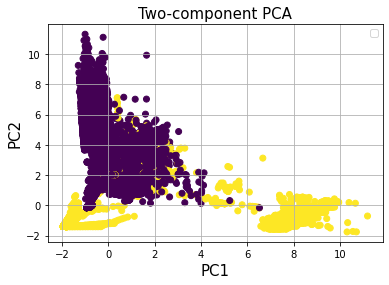

In [24]:
# We use only PC1 and PC2 to plot the scatter plot of projected data observations
# We also color each observation according to its label - malignant or benign

plt.scatter(pca_df.PC1, pca_df.PC2, c = df["label"])
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.grid();
plt.legend();

### Non Linear Dimensionality Reduction with Stochastic Neighborhood Embedded

In [1]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_scaled)

C:\Users\kaush\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kaush\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 274650 samples in 0.080s...
[t-SNE] Computed neighbors for 274650 samples in 90.876s...
[t-SNE] Computed conditional probabilities for sample 1000 / 274650
[t-SNE] Computed conditional probabilities for sample 2000 / 274650
[t-SNE] Computed conditional probabilities for sample 3000 / 274650
[t-SNE] Computed conditional probabilities for sample 4000 / 274650
[t-SNE] Computed conditional probabilities for sample 5000 / 274650
[t-SNE] Computed conditional probabilities for sample 6000 / 274650
[t-SNE] Computed conditional probabilities for sample 7000 / 274650
[t-SNE] Computed conditional probabilities for sample 8000 / 274650
[t-SNE] Computed conditional probabilities for sample 9000 / 274650
[t-SNE] Computed conditional probabilities for sample 10000 / 274650
[t-SNE] Computed conditional probabilities for sample 11000 / 274650
[t-SNE] Computed conditional probabilities for sample 12000 / 274650
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 119000 / 274650
[t-SNE] Computed conditional probabilities for sample 120000 / 274650
[t-SNE] Computed conditional probabilities for sample 121000 / 274650
[t-SNE] Computed conditional probabilities for sample 122000 / 274650
[t-SNE] Computed conditional probabilities for sample 123000 / 274650
[t-SNE] Computed conditional probabilities for sample 124000 / 274650
[t-SNE] Computed conditional probabilities for sample 125000 / 274650
[t-SNE] Computed conditional probabilities for sample 126000 / 274650
[t-SNE] Computed conditional probabilities for sample 127000 / 274650
[t-SNE] Computed conditional probabilities for sample 128000 / 274650
[t-SNE] Computed conditional probabilities for sample 129000 / 274650
[t-SNE] Computed conditional probabilities for sample 130000 / 274650
[t-SNE] Computed conditional probabilities for sample 131000 / 274650
[t-SNE] Computed conditional probabilities for sample 132000 / 274650
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 241000 / 274650
[t-SNE] Computed conditional probabilities for sample 242000 / 274650
[t-SNE] Computed conditional probabilities for sample 243000 / 274650
[t-SNE] Computed conditional probabilities for sample 244000 / 274650
[t-SNE] Computed conditional probabilities for sample 245000 / 274650
[t-SNE] Computed conditional probabilities for sample 246000 / 274650
[t-SNE] Computed conditional probabilities for sample 247000 / 274650
[t-SNE] Computed conditional probabilities for sample 248000 / 274650
[t-SNE] Computed conditional probabilities for sample 249000 / 274650
[t-SNE] Computed conditional probabilities for sample 250000 / 274650
[t-SNE] Computed conditional probabilities for sample 251000 / 274650
[t-SNE] Computed conditional probabilities for sample 252000 / 274650
[t-SNE] Computed conditional probabilities for sample 253000 / 274650
[t-SNE] Computed conditional probabilities for sample 254000 / 274650
[t-SNE] Computed con

[Text(0.5, 1.0, 'T-SNE projection')]

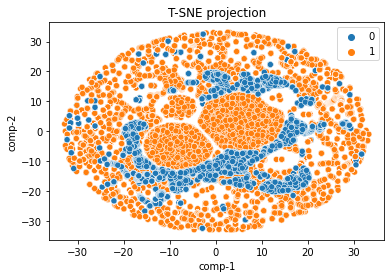

In [28]:
k = pd.DataFrame()
k["y"] = df['label']
k["comp-1"] = z[:,0]
k["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=k.y.tolist(),
                data=k).set(title="T-SNE projection")